## Import necessary libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Import the data

In [2]:
elon_tweets = pd.read_csv('Elon_musk.csv')
elon_tweets

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
del elon_tweets['Unnamed: 0']

## Data understanding

In [4]:
elon_tweets.shape

(1999, 1)

In [5]:
elon_tweets.isna().sum()

Text    0
dtype: int64

In [6]:
elon_tweets.dtypes

Text    object
dtype: object

## Text cleaning

In [7]:
elon_tweets

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
#import the neattext libaries
import neattext.functions as ntxt

In [9]:
#diffrent functions in neattext libary
dir(ntxt)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
elon_tweets['Text']

0                                  @kunalb11 I�m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

### Remove userhandles

In [11]:
elon_tweets['cleaned_tweets'] = elon_tweets['Text'].apply(ntxt.remove_userhandles)
elon_tweets

,Text,cleaned_tweets
0,@kunalb11 I�m an alien,I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-le...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing exec...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative..."
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions ...
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is <U+0001F525><U+0001...


### Remove whitespace

In [12]:
elon_tweets['cleaned_tweets'] = elon_tweets['cleaned_tweets'].apply(ntxt.remove_multiple_spaces)
elon_tweets

,Text,cleaned_tweets
0,@kunalb11 I�m an alien,I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative ..."
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions b...
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is <U+0001F525><U+0001F...


### Remove emojis

In [13]:
elon_tweets['cleaned_tweets'].apply(ntxt.extract_emojis)

0       [�]
1        []
2        []
3        []
4        []
       ... 
1994    [�]
1995     []
1996     []
1997     []
1998     []
Name: cleaned_tweets, Length: 1999, dtype: object

In [14]:
elon_tweets['cleaned_tweets'] = elon_tweets['cleaned_tweets'].apply(ntxt.remove_emojis)

### Remove html tags

In [15]:
elon_tweets['cleaned_tweets'].apply(ntxt.extract_html_tags)

0                                 []
1                                 []
2                                 []
3                                 []
4                                 []
                    ...             
1994                              []
1995                              []
1996                              []
1997    [<U+0001F525>, <U+0001F525>]
1998                              []
Name: cleaned_tweets, Length: 1999, dtype: object

In [16]:
elon_tweets['cleaned_tweets'] = elon_tweets['cleaned_tweets'].apply(ntxt.remove_html_tags)

### Remove punctations

In [17]:
elon_tweets['cleaned_tweets'] = elon_tweets['cleaned_tweets'].apply(ntxt.remove_puncts)
elon_tweets

,Text,cleaned_tweets
0,@kunalb11 I�m an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is nextleve...
2,@joerogan @Spotify Great interview!,Great interview
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative pr...
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions bef...
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is


### Remove stopwords

In [18]:
elon_tweets['cleaned_tweets'].apply(ntxt.extract_stopwords)

0                                                    [an]
1                                 [on, with, is, you, it]
2                                                      []
3                                                    [is]
4                           [for, on, to, the, for, more]
                              ...                        
1994    [it, so, but, the, is, all, out, there, to, in...
1995                                         [to, before]
1996                                                   []
1997                                            [and, is]
1998                                                   []
Name: cleaned_tweets, Length: 1999, dtype: object

In [19]:
elon_tweets['cleaned_tweets'] = elon_tweets['cleaned_tweets'].apply(ntxt.remove_stopwords)

### remove https or urls link

In [20]:
cleaned = []
for i in range(0,len(elon_tweets)):
    text = re.sub(r"http\S+", "", elon_tweets['cleaned_tweets'][i])
    cleaned.append(text)

In [21]:
cleaned

['Im alien',
 'Ray tracing Cyberpunk HDR nextlevel tried',
 'Great interview',
 'Doge underestimated',
 'Congratulations Tesla China amazing execution year',
 'Happy New Year Ox ',
 'Frodo underdoge thought fail ',
 'Haha thanks :)',
 'Tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree Clubhouse',
 '',
 'getting real',
 'Bought Dogecoin lil X toddler hodler',
 'definitely issues sentencing bit high',
 'Thanks fixing',
 'unlock account',
 '',
 'true power haha ',
 'crypto wallet wont private keys avoided costs',
 'app sucks',
 'RT NASA selected Falcon Heavy launch elements lunar Gateway mission ',
 'Yes',
 'predict cash flow reasonably Starlink IPO',
 'Starlink staggeringly difficult technical amp economic endeavor ',
 'SpaceX needs pass deep chasm negative cash flow year ',
 'Lowest cost ton carbon sequestered net value product scalable g ',
 'meant price countries difference taxes amp shipping',
 'intended Earth ideas apply Mars',


In [22]:
elon_tweets['cleaned_tweets'] = cleaned

In [23]:
elon_tweets

,Text,cleaned_tweets
0,@kunalb11 I�m an alien,Im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing Cyberpunk HDR nextlevel tried
2,@joerogan @Spotify Great interview!,Great interview
3,@gtera27 Doge is underestimated,Doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China amazing execution ...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True sounds surreal negative propaganda amp ea...
1995,@PPathole Make sure to read ur terms &amp; con...,sure read ur terms amp conditions clicking accept
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb Dumber


In [24]:
elon_tweets['cleaned_tweets'].unique()

array(['Im alien', 'Ray tracing Cyberpunk HDR nextlevel tried',
       'Great interview', ..., 'Samwise Gamgee', 'Altho Dumb Dumber',
       'Progress update August 28'], dtype=object)

# Sentiment analysis

In [25]:
from textblob import TextBlob

In [26]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [27]:
#Expriments for confirm
experiment = elon_tweets['cleaned_tweets'].iloc[0]
experiment

'Im alien'

In [28]:
get_sentiment(experiment)

{'polarity': -0.25, 'subjectivity': 0.75, 'sentiment': 'Negative'}

In [29]:
elon_tweets['sentiment_result'] = elon_tweets['cleaned_tweets'].apply(get_sentiment)
elon_tweets['sentiment_result']

0       {'polarity': -0.25, 'subjectivity': 0.75, 'sen...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.8, 'subjectivity': 0.75, 'senti...
3       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4       {'polarity': 0.6000000000000001, 'subjectivity...
                              ...                        
1994    {'polarity': 0.1111111111111111, 'subjectivity...
1995    {'polarity': 0.5, 'subjectivity': 0.8888888888...
1996    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1997    {'polarity': -0.375, 'subjectivity': 0.5, 'sen...
1998    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_result, Length: 1999, dtype: object

In [30]:
elon_tweets = elon_tweets.join(pd.json_normalize(elon_tweets['sentiment_result']))
elon_tweets

,Text,cleaned_tweets,sentiment_result,polarity,subjectivity,sentiment
0,@kunalb11 I�m an alien,Im alien,"{'polarity': -0.25, 'subjectivity': 0.75, 'sen...",-0.250000,0.750000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing Cyberpunk HDR nextlevel tried,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,Great interview,"{'polarity': 0.8, 'subjectivity': 0.75, 'senti...",0.800000,0.750000,Positive
3,@gtera27 Doge is underestimated,Doge underestimated,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China amazing execution ...,"{'polarity': 0.6000000000000001, 'subjectivity...",0.600000,0.900000,Positive
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True sounds surreal negative propaganda amp ea...,"{'polarity': 0.1111111111111111, 'subjectivity...",0.111111,0.508333,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,sure read ur terms amp conditions clicking accept,"{'polarity': 0.5, 'subjectivity': 0.8888888888...",0.500000,0.888889,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb Dumber,"{'polarity': -0.375, 'subjectivity': 0.5, 'sen...",-0.375000,0.500000,Negative


In [31]:
elon_tweets['sentiment'].value_counts()

Neutral     1020
Positive     778
Negative     201
Name: sentiment, dtype: int64

### Visualize sentiment counts

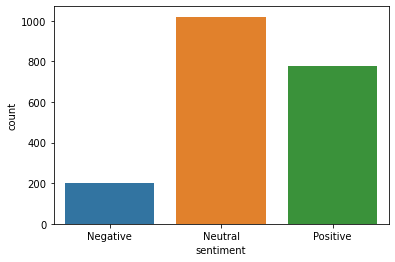

In [32]:
sns.countplot(x='sentiment',data=elon_tweets)
plt.show()

In [33]:
positive_tweet = elon_tweets[elon_tweets['sentiment'] == 'Positive']['cleaned_tweets'].tolist()
neutral_tweet = elon_tweets[elon_tweets['sentiment'] == 'Neutral']['cleaned_tweets'].tolist()
negative_tweet = elon_tweets[elon_tweets['sentiment'] == 'Negative']['cleaned_tweets'].tolist()

In [34]:
postive_tokens = [token for line in positive_tweet  for token in line.split()]
negative_tokens = [token for line in negative_tweet  for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [35]:
postive_tokens

['Great',
 'interview',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'year',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Haha',
 'thanks',
 ':)',
 'entertaining',
 'outcome',
 'likely',
 'getting',
 'real',
 'definitely',
 'issues',
 'sentencing',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'true',
 'power',
 'haha',
 'predict',
 'cash',
 'flow',
 'reasonably',
 'Starlink',
 'IPO',
 'bit',
 'high',
 'Doge',
 'appears',
 'inflationary',
 'meaningfully',
 '(fixed',
 '#',
 'coins',
 'unit',
 'time)',
 'Wow',
 'cute',
 'Extremely',
 'misleading',
 'image',
 'doesnt',
 'reflect',
 'true',
 'time',
 'cost',
 'people',
 'rain',
 'amp',
 'pain',
 'fun',
 'crypto',
 'True',
 'easy',
 'decades',
 'intense',
 'work',
 'look',
 'old',
 'notes',
 'emails',
 'texts',
 'read',
 'great',
 'Sure',
 'great',
 'thing',
 'restaurants',
 'hang',
 'strangers',
 'SJM',
 'wow',
 'said',
 'ship',
 'landing',
 'burn',
 'clear',
 'solution',
 'greate',
 'use',
 'hot',
 'gas',
 'maneuvering',
 '(RCS)',


In [36]:
# Get Most Commonest Keywords
from collections import Counter

In [37]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [38]:
get_tokens(postive_tokens)

{'amp': 111,
 'Tesla': 46,
 'great': 44,
 'RT': 40,
 'Great': 29,
 'haha': 28,
 'Haha': 26,
 'good': 26,
 'high': 25,
 'Good': 23,
 'best': 22,
 'sure': 21,
 'Sure': 20,
 'better': 20,
 'right': 20,
 'Exactly': 19,
 'True': 18,
 'Dragon': 17,
 'new': 17,
 'true': 16,
 'Pretty': 15,
 'production': 15,
 'people': 14,
 'super': 14,
 'need': 14,
 'Thanks': 13,
 'Absolutely': 13,
 'point': 13,
 'Yes': 13,
 'New': 12}

In [39]:
most_common_pos_words = get_tokens(postive_tokens)
most_common_neg_words = get_tokens(negative_tokens)
most_common_neut_words = get_tokens(neutral_tokens)

In [40]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])

In [41]:
pos_df

,words,scores
0,amp,111
1,Tesla,46
2,great,44
3,RT,40
4,Great,29
5,haha,28
6,Haha,26
7,good,26
8,high,25
9,Good,23


###  Plot with seaborn

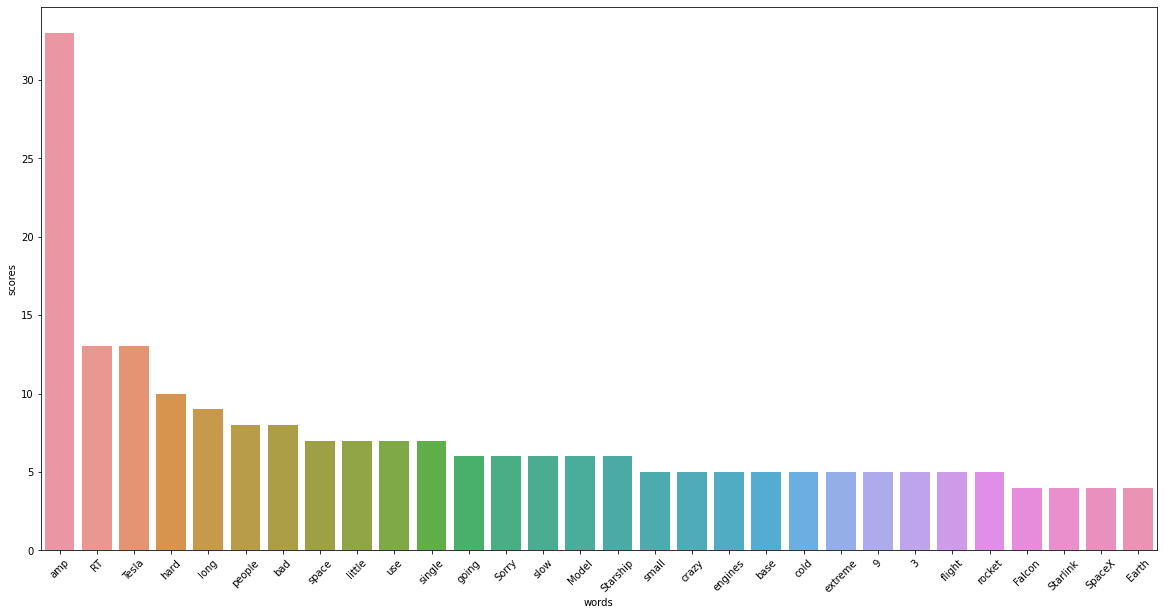

In [44]:
plt.figure(figsize=(20,10))
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

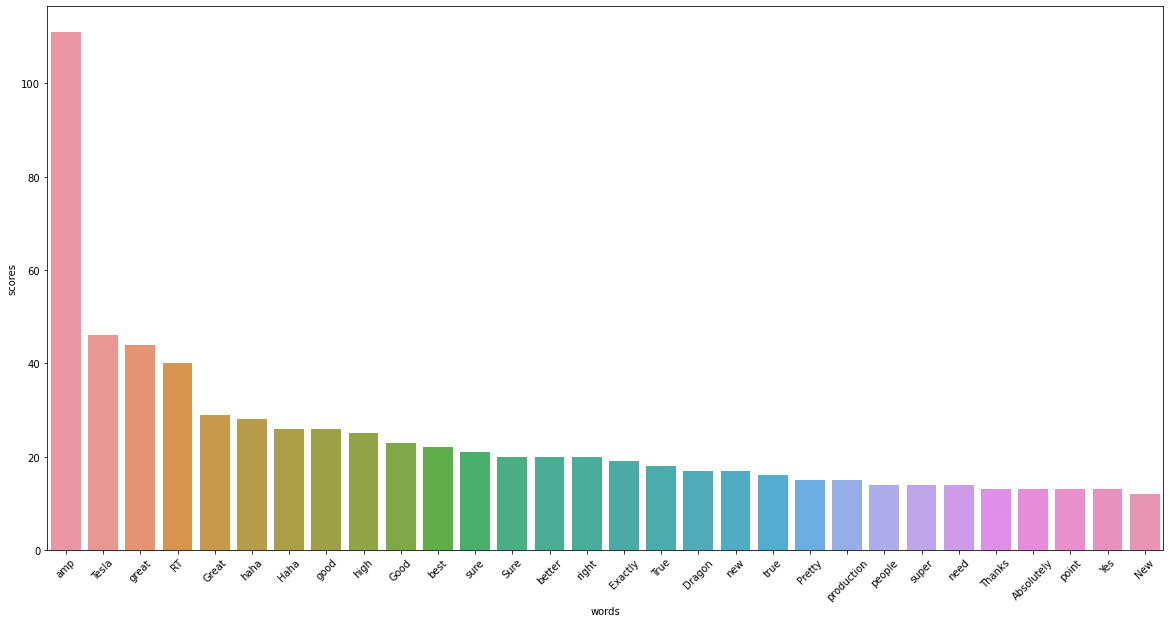

In [43]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

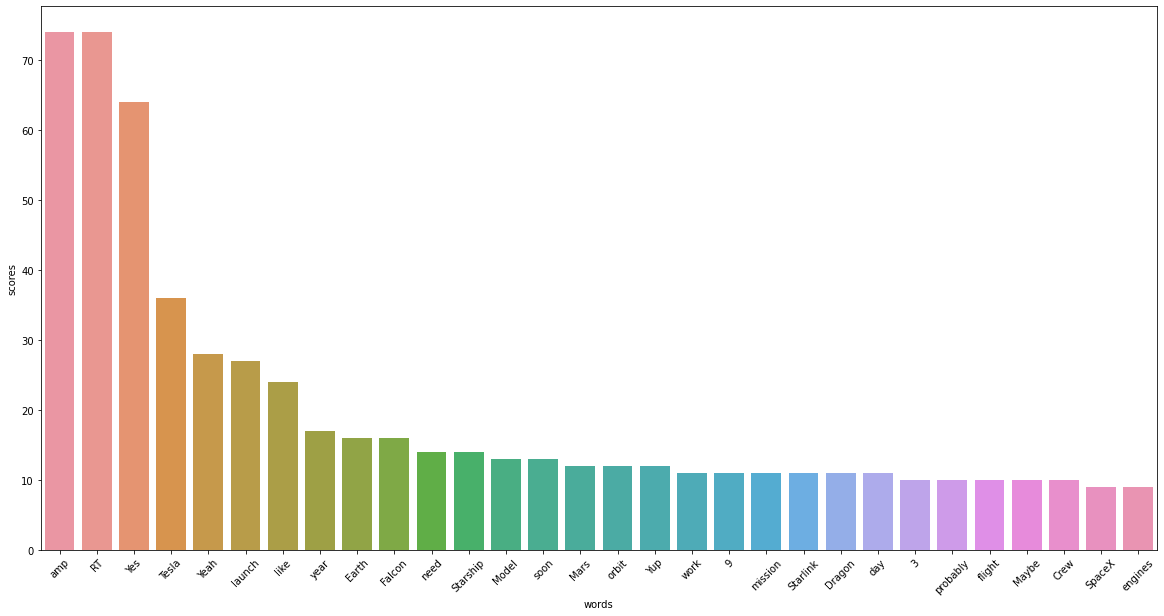

In [45]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [46]:
### Word Cloud
from wordcloud import WordCloud

In [47]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [48]:
pos_docx = ' '.join(postive_tokens)
neg_docx = ' '.join(negative_tokens)
neu_docx = ' '.join(neutral_tokens)

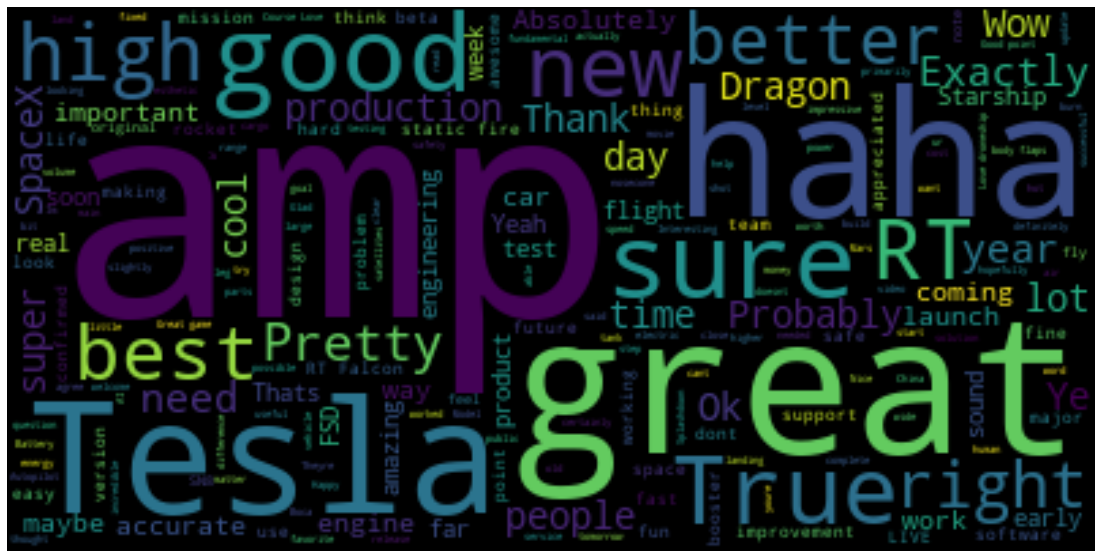

In [49]:
plot_wordcloud(pos_docx)

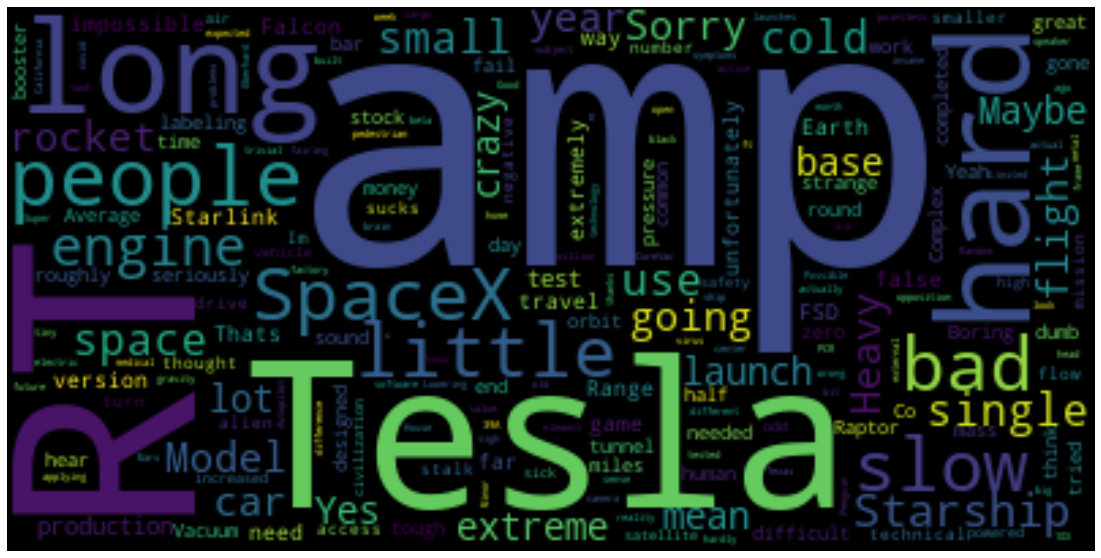

In [50]:
plot_wordcloud(neg_docx)

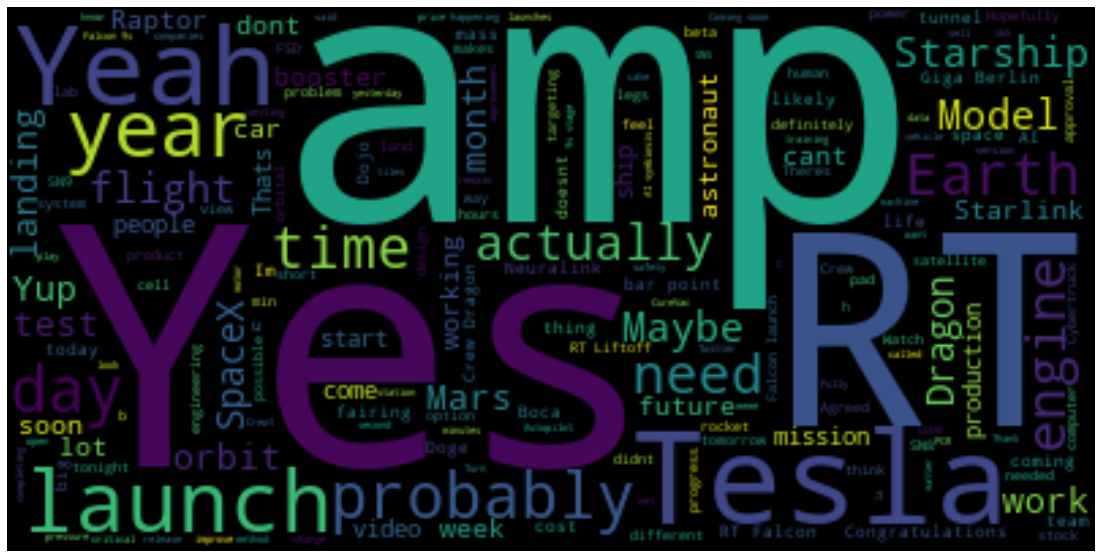

In [51]:
plot_wordcloud(neu_docx)

## ============================= End ====================================